In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('/Users/bhavikmangla/Documents/mrm/CarPrice_Assignment.csv', index_col=False)

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.enginesize[:150].values

array([130, 130, 152, 109, 136, 136, 136, 136, 131, 131, 108, 108, 164,
       164, 164, 209, 209, 209,  61,  90,  90,  90,  90,  98,  90,  90,
        90,  98, 122, 156,  92,  92,  79,  92,  92,  92,  92, 110, 110,
       110, 110, 110, 110, 111,  90,  90, 119, 258, 258, 326,  91,  91,
        91,  91,  91,  70,  70,  70,  80, 122, 122, 122, 122, 122, 122,
       140, 134, 183, 183, 183, 183, 234, 234, 308, 304, 140,  92,  92,
        92,  98, 110, 122, 156, 156, 156, 122, 122, 110, 110,  97, 103,
        97,  97,  97,  97,  97,  97,  97,  97, 120, 120, 181, 181, 181,
       181, 181, 181, 120, 152, 120, 152, 120, 152, 120, 152, 120, 152,
       134,  90,  98,  90,  90,  98, 122, 156, 151, 194, 194, 194, 203,
       132, 132, 121, 121, 121, 121, 121, 121,  97, 108, 108, 108, 108,
       108, 108, 108, 108, 108, 108, 108])

In [8]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
df.shape

(205, 26)

# Data Visualization

In [39]:
df.loc[:149,['enginesize','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']].values


array([[ 130. ,   88.6,  168.8, ..., 5000. ,   21. ,   27. ],
       [ 130. ,   88.6,  168.8, ..., 5000. ,   21. ,   27. ],
       [ 152. ,   94.5,  171.2, ..., 5000. ,   19. ,   26. ],
       ...,
       [ 108. ,   97. ,  173.5, ..., 5200. ,   25. ,   31. ],
       [ 108. ,   96.9,  173.6, ..., 4800. ,   23. ,   29. ],
       [ 108. ,   96.9,  173.6, ..., 4800. ,   23. ,   23. ]])

# Splitting data into test and train

In [9]:
x_train, x_test, y_train, y_test = df.loc[:169,['enginesize','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']].values,df.loc[170:,['enginesize','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']].values,df.price[:170].values,df.price[170:].values
x_train = np.reshape(x_train, (-1,13))
x_test = np.reshape(x_test, (-1,13))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (170, 13)
Test - Predictors shape (35, 13)
Train - Target shape (170, 1)
Test - Target shape (35, 1)


# Linear Regression using Scikit

This is the linear regression model implemented using scikit library. 

In [10]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression()

In [11]:
prediction = cls.predict(x_test)

In [12]:
#Parameters used for the model 
cls.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[ 1.23361440e+02  1.48811424e+02 -6.22084783e+01  3.70667681e+02
   1.55146200e+02  1.56601053e+00 -1.05687833e+03 -3.19006691e+03
   3.06492868e+02  3.38557044e+01  2.93750834e+00 -3.13388082e+02
   2.25364057e+02]]


In [14]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [-49650.7507246]


In [15]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 8168034.741540391


In [16]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.5505378890974748


ValueError: x and y must be the same size

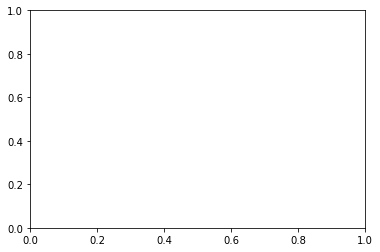

In [17]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('Engine size',)
plt.ylabel('Horse Power')
plt.title('Linear Regression')

# Linear Regression using normal equaltions

In [50]:
def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    #
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    #
    return theta

In [51]:
def predict_func(slope,intercept,x_test):
    #
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i]) + intercept)
        
    return pred

In [52]:
def mse_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [53]:
def rsq(prediction, y_test):
    #
    total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

In [54]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

Intercept of the model [-52827.90532549]
Slope of the model [127.49319772]
Mean squared error of the model 438377179022.4157
R squared value -22706.932022602767


In [58]:
y_test.shape

(55, 1)

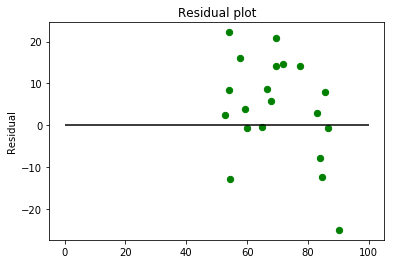

In [ ]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

# Linear Regression using Gradient Descent

In [ ]:
def mse_calc(slope, intercept, x_train, y_train):
    tot_error = 0
    pred = []
    for i in range(len(x_train)):
        #calculating total error. It follows the formula y=mx+c
        #m is the slope and c is the intercept
        pred.append(((slope*x_train[i]) + intercept))
        tot_error += (y_train[i] - ((slope*x_train[i]) + intercept)) ** 2
        
    error = tot_error / float(len(x_train))
    return error, pred

In [ ]:
#gradient descent 
def grad_descent(s_slope, s_intercept, l_rate, iter_val, x_train, y_train):
    
    for i in range(iter_val):
        int_slope = 0
        int_intercept = 0
        n_pt = float(len(x_train))
        
        
        for i in range(len(x_train)):
            int_intercept += - (2/n_pt) * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            int_slope += - (2/n_pt) * x_train[i] * (y_train[i] - ((s_slope * x_train[i]) + s_intercept))
            
        final_slope = s_slope - (l_rate * int_slope)
        final_intercept = s_intercept - (l_rate * int_intercept)
        s_slope = final_slope
        s_intercept = final_intercept
        
        
    return  s_slope, s_intercept

In [2]:
#defining slope and intercept value as 0 
learning_rate = 0.0001
start_slope = 0
start_intercept = 0
iteration = 50
#intial run
grad_slope, grad_intercept = grad_descent(start_slope, start_intercept, learning_rate, iteration, x_train, y_train)
final_e_value, prediction = mse_calc(grad_slope, grad_intercept, x_test, y_test)
#
print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_e_value)
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)
#Graph
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='blue', linewidth = 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

NameError: name 'grad_descent' is not defined